In [1]:
import tweepy
import time
import datetime
from datetime import *
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn

consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
source_account=[]
tweet_text=[]
tweet_date=[]
compound_list=[]
pos_list=[]
neu_list=[]
neg_list=[]

target_term=['@bbc','@abc','@cnn','@RT_com','@foxnews']

In [3]:
for target in target_term:

    public_tweets=api.user_timeline(target, count=100, result_type='recent')

    for tweet in public_tweets:
        
        source_acc=tweet['user']['name']
        source_account.append(source_acc)

        text_acc=tweet['text']
        tweet_text.append(text_acc)

        created_acc=tweet['created_at']
        tweet_date.append(created_acc)

        scores=analyzer.polarity_scores(text_acc)
        compound=scores['compound']
        pos=scores['pos']
        neu=scores['neu']
        neg=scores['neg']

        compound_list.append(compound)
        pos_list.append(pos)
        neu_list.append(neu)
        neg_list.append(neg)

In [4]:
tweet_df=pd.DataFrame({'Source Account':source_account,
'Text':tweet_text,'Date':tweet_date,'Compound':compound_list,
'Positive':pos_list,'Neutral':neu_list,"Negative":neg_list})
tweet_df=tweet_df[['Source Account', 'Date','Text','Negative','Neutral','Positive','Compound']]
tweet_df.head(10)

,Source Account,Date,Text,Negative,Neutral,Positive,Compound
0,BBC,Thu Dec 07 18:00:02 +0000 2017,"Well, the intention was there. 😂\nVia @BBCTheS...",0.000,0.769,0.231,0.2732
1,BBC,Thu Dec 07 17:30:10 +0000 2017,The first Scrooge: How the world’s best-known ...,0.177,0.823,0.000,-0.4215
2,BBC,Thu Dec 07 17:00:06 +0000 2017,🏂 These prosthetic feet are designed specifica...,0.000,1.000,0.000,0.0000
3,BBC,Thu Dec 07 16:00:04 +0000 2017,🎤😍 Still can't get over @RitaOra's #SLFN perfo...,0.000,1.000,0.000,0.0000
4,BBC,Thu Dec 07 14:00:08 +0000 2017,"Embracing me-time, onesie-wearing and cheeky s...",0.000,0.781,0.219,0.6369
5,BBC,Thu Dec 07 13:39:52 +0000 2017,RT @BBCTwo: This is why you should NEVER mess ...,0.143,0.857,0.000,-0.3612
6,BBC,Thu Dec 07 13:30:01 +0000 2017,Can an employer demand that you go to work nak...,0.089,0.911,0.000,-0.2168
7,BBC,Thu Dec 07 13:00:07 +0000 2017,Passers-by in this Belgian town have been aski...,0.000,1.000,0.000,0.0000
8,BBC,Thu Dec 07 12:30:06 +0000 2017,🎄🍿 A snack to bring a little joy to your world...,0.000,0.788,0.212,0.5434
9,BBC,Thu Dec 07 12:00:08 +0000 2017,Why I’m not going to any Christmas parties thi...,0.000,0.816,0.184,0.4019


In [5]:

t1=tweet_df.iloc[1,1]
t2 = datetime.strptime(t1,'%a %b %d %H:%M:%S +0000 %Y')
year=str(t2.year)
month=str(t2.month)
day=str(t2.day)

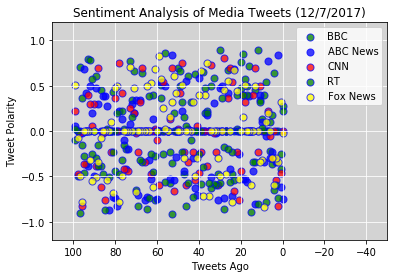

In [6]:
BBC_df=tweet_df.loc[tweet_df['Source Account']=='BBC']
ABC_df=tweet_df.loc[tweet_df['Source Account']=='ABC News']
CNN_df=tweet_df.loc[tweet_df['Source Account']=='CNN']
RT_df=tweet_df.loc[tweet_df['Source Account']=='RT']
Fox_df=tweet_df.loc[tweet_df['Source Account']=='Fox News']

plt.grid(True,color='white')

plt.scatter(BBC_df.index,BBC_df['Compound'] ,
            marker='o',facecolors='green',alpha=0.75,edgecolors='blue',s=50)
plt.scatter(ABC_df.index-100,ABC_df['Compound'] ,
            marker='o',facecolors='blue',alpha=0.75,edgecolors='blue',s=50)
plt.scatter(CNN_df.index-200,CNN_df['Compound'] ,
            marker='o',facecolors='red',alpha=0.75,edgecolors='blue',s=50)
plt.scatter(RT_df.index-300,RT_df['Compound'] ,
            marker='o',facecolors='green',alpha=0.75,edgecolors='blue',s=50)
plt.scatter(Fox_df.index-400,Fox_df['Compound'] ,
            marker='o',facecolors='yellow',alpha=0.75,edgecolors='blue',s=50)

plt.title('Sentiment Analysis of Media Tweets'+' ('+month+'/'+day+'/'+year+')')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.xlim(110,-50)
plt.ylim(-1.2,1.2)
legend_var=tweet_df['Source Account'].unique()
plt.legend(legend_var,loc='best')
ax=plt.gca()
ax.set_facecolor('lightgray')
plt.savefig('Tweet_Sentiment_Scatter.png')
plt.show()

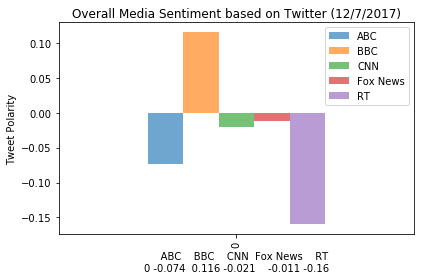

In [7]:
bbc_mean=round(BBC_df['Compound'].mean(),3)
abc_mean=round(ABC_df['Compound'].mean(),3)
cnn_mean=round(CNN_df['Compound'].mean(),3)
rt_mean=round(RT_df['Compound'].mean(),3)
fox_mean=round(Fox_df['Compound'].mean(),3)

mean_df=pd.DataFrame({'BBC':bbc_mean,
'ABC':abc_mean,'CNN':cnn_mean,'RT':rt_mean,'Fox News':fox_mean},index=[0])

mean_df.plot(kind='bar',alpha=0.65)
plt.title('Overall Media Sentiment based on Twitter'+' ('+month+'/'+day+'/'+year+')')
plt.ylabel('Tweet Polarity')
plt.xlabel(mean_df)
plt.tight_layout()
plt.savefig('Overall_Sentiment_Bar.png')
plt.show()


In [8]:
new_path=os.path.join('Tweet_Sentiment.csv')
tweet_df.to_csv(new_path,encoding='utf-8',index=False,header=True)